![NumPy logo](img/numpylogo.svg)

# Shaping and Broadcasting

Often the operations on arrays are dependent on their shape or shapes.  Being able to manipulate these shapes and how we utilize them is much of the power in using NumPy flexibly.

In [1]:
import numpy as np

## Broadcasting

Sometimes we combine arrays of the same shape with some numeric operation.  But often one or more of the arrays (or scalars) participating in an operation are smaller in some dimensions than the other.  

*Broadcasting* is treating an array as if it contained multiple copies of itself along some implied axis.

In [2]:
# Combine two arrays of the same shape
arr1 = np.arange(1, 13).reshape(2, 2, 3)
arr2 = 10 * np.arange(1, 13).reshape(2, 2, 3)

In [3]:
print(arr1)
print('-----')
print(arr2)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
-----
[[[ 10  20  30]
  [ 40  50  60]]

 [[ 70  80  90]
  [100 110 120]]]


In [4]:
# Combine arrays of the same shape
arr2 + arr1

array([[[ 11,  22,  33],
        [ 44,  55,  66]],

       [[ 77,  88,  99],
        [110, 121, 132]]])

In [5]:
# Notice that division changes the dtype of the new array
arr2 / arr1

array([[[10., 10., 10.],
        [10., 10., 10.]],

       [[10., 10., 10.],
        [10., 10., 10.]]])

### Scalars

We have already seen that scalar values can be *broadcast* onto an entire array (or onto some selection from them)

In [6]:
# Mutliply every element by scalar
arr1 * 100

array([[[ 100,  200,  300],
        [ 400,  500,  600]],

       [[ 700,  800,  900],
        [1000, 1100, 1200]]])

In [7]:
# Add a scalar to a selection of elements only
arr1[arr1 % 2 == 0] += 1000
print(arr1)

[[[   1 1002    3]
  [1004    5 1006]]

 [[   7 1008    9]
  [1010   11 1012]]]


### Subset dimensionality

The simplest case of array broadcasting to other arrays is when one array simply has fewer dimensions than another, but is the same length in the *last* dimension.

In [8]:
arr1 = np.arange(1, 13).reshape(2, 2, 3)
arr2 = np.array([100, 200, 300])
print(arr1)
print('-----')
print(arr2)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
-----
[100 200 300]


In [9]:
# Combine 3-D array with 1-D array
arr1 + arr2

array([[[101, 202, 303],
        [104, 205, 306]],

       [[107, 208, 309],
        [110, 211, 312]]])

NumPy expects compatibility in the length of the last dimension or dimensions.  This is the explicit rule, and Python prefers being explicit to "do what I mean" by guessing.

In [10]:
# A 3-D array with same values but different shape than arr1
arr3 = np.arange(1, 13).reshape(3, 2, 2)
print(arr3)

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


In [12]:
try:
    print(arr3 + arr2)
except Exception as err:
    print(err)

operands could not be broadcast together with shapes (3,2,2) (3,) 


The rule described works when the *less dimensional* array itself has multiple dimensions.

In [13]:
arr4 = np.array([[10, 100], [-1, -10]])
print("arr3.shape:", arr3.shape, "/ arr4.shape", arr4.shape)
print("arr4:")
print(arr4)
arr3 * arr4

arr3.shape: (3, 2, 2) / arr4.shape (2, 2)
arr4:
[[ 10 100]
 [ -1 -10]]


array([[[  10,  200],
        [  -3,  -40]],

       [[  50,  600],
        [  -7,  -80]],

       [[  90, 1000],
        [ -11, -120]]])

### Combined Dimensionality

Sometimes arrays are extended in different lengths in different dimensions, but they can still be broadcast in an unambiguous way.

In [14]:
a1 = np.arange(1, 11).reshape(1, 10)
a2 = np.arange(1, 11).reshape(10, 1)
print("Multiplication Table:", a1.shape, "x", a2.shape)
print(a1 * a2)

Multiplication Table: (1, 10) x (10, 1)
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


In the above example, both arrays are two dimensional. But the "row array" could equally well be 1-D for this purpose.  A column array must inherently be represented in 2-D in NumPy.

In [16]:
a2

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [15]:
a3 = np.arange(1, 11)
print("Multiplication Table:", a2.shape, "x", a3.shape)
print(a2 * a3)

Multiplication Table: (10, 1) x (10,)
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


## The Rules for Broadcasting

It can be confusing at first, but you can work through the rules for broadcasting in a step by step way.  These rules *may* tell you you have shapes that cannot be broadcast together.

In [17]:
arr1 = np.arange(1, 11).reshape(1, 10)
arr2 = np.arange(1, 11).reshape(2, 5)
try:
    print(arr1 + arr2)
except Exception as err:
    print(err)

operands could not be broadcast together with shapes (1,10) (2,5) 


The above has a relatively simple thing it *could* mean: Double the first dimension of the first array, and double the second dimension of the second array, then they would have same shape.  However, NumPy does not make that assumption for you.

In order for an operation to broadcast, the size of all the trailing dimensions for both arrays must either be *equal* or be *one*.  Dimensions that are one, and dimensions that are missing from the "head," are duplicated to match the larger number.  So, we have:

|Array            |Shape          |
|:----------------|--------------:|
|A      (1d array)|              3|
|B      (2d array)|          2 x 3|
|Result (2d array)|          2 x 3|

|Array            |Shape          |
|:----------------|--------------:|
|A      (2d array)|          6 x 1|
|B      (3d array)|      1 x 6 x 4|
|Result (3d array)|      1 x 6 x 4|

|Array            |Shape          |
|:----------------|--------------:|
|A      (4d array)|  3 x 1 x 6 x 1|
|B      (3d array)|      2 x 1 x 4|
|Result (4d array)|  3 x 2 x 6 x 4|

Phrased slightly differently:
    
*  Tails must be the same, ones are wild.
*  If one shape is shorter than the other, pad the shorter shape on the LHS with `1`s.
  * Now, from the right, the shapes must be identical with ones acting as wild cards.

## Shaping

In several modules, we have seen the `array.reshape()` method, which can achieve any shape we like manually.  However, there are numerous techniques in NumPy to reshape arrays in a way that is contextual to their current shapes.

### Tiling and New Axes

We encounted some problems above where it seemed like broadcasting *should* work, but it does not.

In [18]:
arr1 = np.arange(12).reshape(3, 4)
arr2 = 10 * np.arange(3)
print('arr1:')
print(arr1)
print('arr2:')
print(arr2)

arr1:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
arr2:
[ 0 10 20]


In [19]:
# Why not just assume we broadcast to columns?
try:
    arr1 + arr2
except ValueError as err:
    print(err)

operands could not be broadcast together with shapes (3,4) (3,) 


We can solve this problem by calling `.reshape()` to add needed dimensions.  But we can also use a special slice object called `np.newaxis` to "slice" into a dimension that does not yet exist.

In [20]:
arr1 + arr2.reshape(3, 1)

array([[ 0,  1,  2,  3],
       [14, 15, 16, 17],
       [28, 29, 30, 31]])

In [21]:
arr1 + arr2[:, np.newaxis]

array([[ 0,  1,  2,  3],
       [14, 15, 16, 17],
       [28, 29, 30, 31]])

When we broadcast we create *virtual* duplicates of rows, columns, etc.  However, doing this does not actually allocate more memory to hold those new dimensions, it is a sort of slight-of-hand to reuse the data in an existing smaller shape array.

This virtual duplication only takes (virtual) dimensions of length one to multiply as needed to match the other array in an operation.  In concept, why not allow any multiplication as long as one length evenly divides another?

We can construct such virtual dimensions by tiling, fortunately.

In [22]:
# We wish to combine a 4x4 array with a 2x2 array
arr1 = np.arange(16).reshape(4, 4)
arr2 = np.array([[-1, 1], [-10, 10]])
print('arr1:')
print(arr1)
print('arr2:')
print(arr2)

arr1:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
arr2:
[[ -1   1]
 [-10  10]]


In [23]:
try:
    print(arr1 * arr2)
except ValueError as err:
    print(err)

operands could not be broadcast together with shapes (4,4) (2,2) 


In [24]:
arr1 * np.tile(arr2, (2, 2))

array([[   0,    1,   -2,    3],
       [ -40,   50,  -60,   70],
       [  -8,    9,  -10,   11],
       [-120,  130, -140,  150]])

### Rectangular selection for operations

We may not want to tile.  For some purpose, it may make sense to apply the smaller array against only a portion of the larger array.  Of course, the techniques could be combined as well.

In [25]:
# Apply one 2-D array to the middle of another
newarr = arr1.copy()
print("newarr\n", newarr)
print("arr2\n", arr2)
newarr[1:3, 1:3] *= arr2
newarr

newarr
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
arr2
 [[ -1   1]
 [-10  10]]


array([[  0,   1,   2,   3],
       [  4,  -5,   6,   7],
       [  8, -90, 100,  11],
       [ 12,  13,  14,  15]])

In [26]:
# Tile a 1-D array, but apply it against middle of another
newarr = arr1.copy()
arr3 = np.array([-100, 100, -20])
newarr[1:3, 1:4] += np.tile(arr3, (2, 1))
newarr

array([[  0,   1,   2,   3],
       [  4, -95, 106, -13],
       [  8, -91, 110,  -9],
       [ 12,  13,  14,  15]])

# Exercises

These exercises use concepts introduced in in this module, and build on concepts you learned earlier.

In [27]:
%matplotlib inline
np.set_printoptions(precision=2, suppress=True)
from src.numpy_exercises import *

## Heat Diffusion

This longer exercise is to model heat diffusion in sequential time steps.  There are several simplifying assumption here:

* Temperatures are measured in Kelvin, with 0 meaning absolute zero
* Outside the "plate" we are measuring, all heat diffuses infinitely fast; in other words, the temperatures "off the grid" stay at absolute zero.
* During one timestep, one half the heat energy of each point transfers to the points adjacent to it (up/down; left/right; diagonals do not allow transfer).
* Notice that because of the diffusion outside the plate, the entire plate will also eventually cool to absolute zero

In a small plate we might see this in the first four timesteps:

Timestep 0:
```

[[  0.   0.   0.]
 [  0. 310.   0.]
 [  0.   0.   0.]]
```

Timestep 1:
```
[[  0.    38.75   0.  ]
 [ 38.75 155.    38.75]
 [  0.    38.75   0.  ]]
```

Timestep 2:
```
[[ 9.69 38.75  9.69]
 [38.75 96.88 38.75]
 [ 9.69 38.75  9.69]]
```

Timestep 3:
```
[[14.53 33.91 14.53]
 [33.91 67.81 33.91]
 [14.53 33.91 14.53]]
```

In this exercise you want to implement a `step()` function that can move forward through timesteps of the heat diffusion.  The `.result` provided in the exercise is what you should obtain after ten timesteps.

In [28]:
arr = ex4_1.arr.copy()
ex4_1.new()
ex4_1

HINT:
  This object's .arr contains temperatures across a plate.
  You can visualize these using its .graph attribute.
  The .reset() method reinitializes a plate.
  the .new() method creates a new randomized plate.
  The .step() method moves the system forward by timesteps.

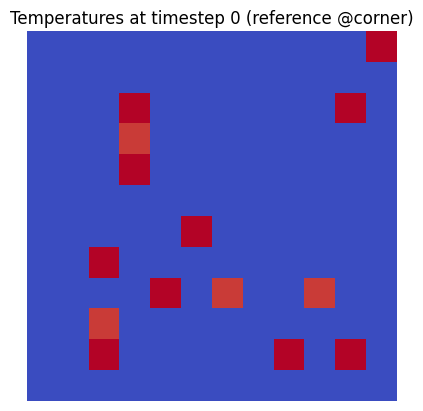

In [29]:
ex4_1.graph

**Bonus Question**: How many timesteps do you need to take until the entire plate reaches absolute zero (within rounding errors)?  Note that `.frozen_step` contains the answer to compare to.

In [ ]:
print("Timesteps to absolute zero:", ex4_1.frozen_step)
arr = ex4_1.arr.copy()

---

**Extra Credit**: Create a variation of your step function that allows you to control diffusion rate.  I.e. change the 50% diffusion at each timestep to a different value.  Note that no code or attribute to test this is provided; you will need to develop your own tests for your code.

In [ ]:
def step(heat_arr, diffusion=0.5):
    # Do stuff here
    return new_heat

---

**Extra Extra Credit**: Can you make a variation of the diffusion `step()` function that includes diagnally adjascent grid points? What about one that allows influence from "nearby" grid points that are not immediately adjacent?

In [ ]:
def step_plus(heat_arr, specs=...):
    # Do stuff here
    return new_heat